In [11]:
import pandas as pd
df=pd.read_csv("Example.csv")
df

,Height,Weight
0,172,78
1,173,57
2,174,32
3,175,78
4,176,90
5,177,79
6,178,58
7,179,33
8,180,79
9,181,91


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Height  19 non-null     int64
 1   Weight  19 non-null     int64
dtypes: int64(2)
memory usage: 436.0 bytes


In [12]:
df.head()

,Height,Weight
0,172,78
1,173,57
2,174,32
3,175,78
4,176,90


In [3]:
df.describe

<bound method NDFrame.describe of     Height  Weight
0      172      78
1      173      57
2      174      32
3      175      78
4      176      90
5      177      79
6      178      58
7      179      33
8      180      79
9      181      91
10     182      80
11     183      59
12     184      34
13     185      80
14     186      92
15     187      81
16     188      60
17     189      79
18     190      58>

In [13]:
df.tail()

,Height,Weight
14,186,92
15,187,81
16,188,60
17,189,79
18,190,58


In [4]:
df.columns

Index(['Height', 'Weight'], dtype='object')

In [5]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

Text(0.5, 1.0, 'Boxplot of Weight')

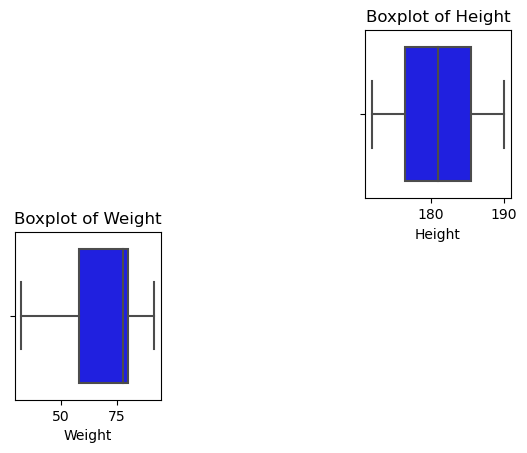

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
df_eda=df
plt.subplot(2, 3, 3)
sns.boxplot(data=df_eda, x='Height', color='blue')
plt.title('Boxplot of Height')

plt.subplot(2, 3, 4)
sns.boxplot(data=df_eda, x='Weight', color='blue')
plt.title('Boxplot of Consumption')

In [14]:
df.min()

Height    172
Weight     32
dtype: int64

In [16]:
df.max()

Height    190
Weight     92
dtype: int64

Text(0.5, 1.0, 'Scatter Plot Example')

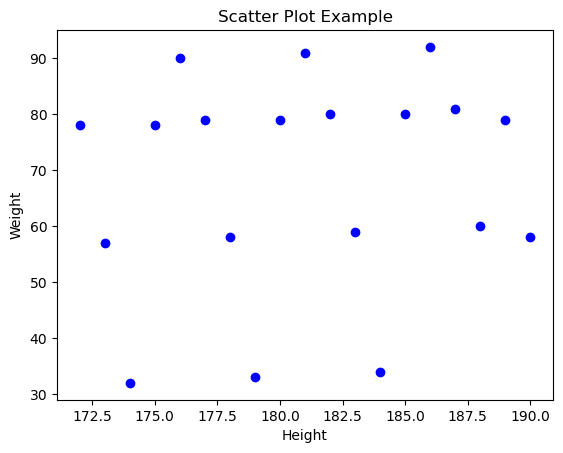

In [18]:
plt.scatter(df['Height'],df['Weight'],color='blue',marker='o')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Scatter Plot Example")

In [20]:
df.corr()

,Height,Weight
Height,1.000000,0.104511
Weight,0.104511,1.000000


Text(0.5, 1.0, 'Distribution of Weight')

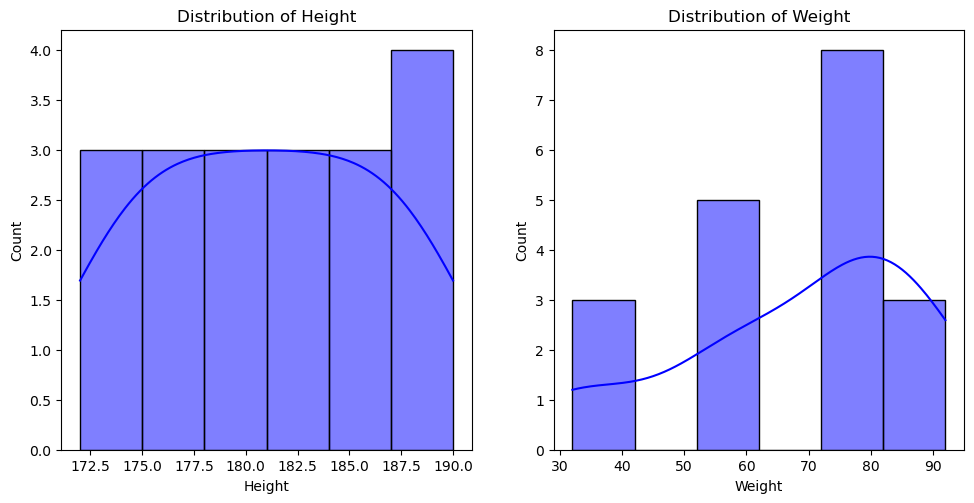

In [21]:
df_eda = df
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 1)
sns.histplot(df_eda['Height'], kde=True, color='blue')
plt.title('Distribution of Height')

plt.subplot(2, 3, 2)
sns.histplot(df_eda['Weight'], kde=True, color='blue')
plt.title('Distribution of Weight')

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

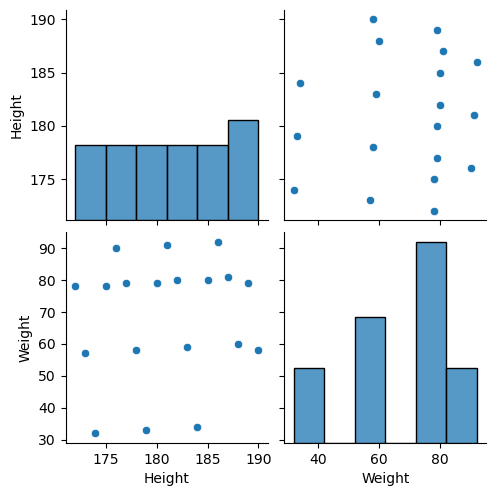

In [22]:
plt.figure(figsize=(20,20))#figuresize gives the height and width of the graph
sns.pairplot(df_eda)

# Supressing warnings

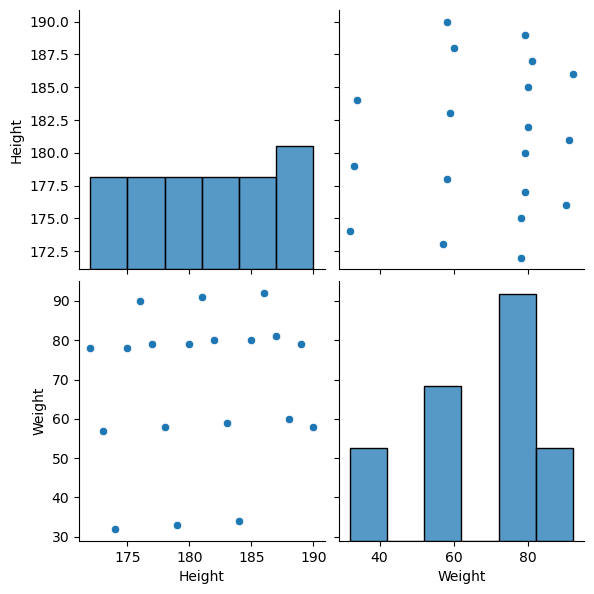

In [25]:
import warnings
warnings.simplefilter("ignore", UserWarning)

sns.pairplot(df, height=3)
plt.show()


# Storing independent variable in x

In [32]:
x=df['Height']
x

0     172
1     173
2     174
3     175
4     176
5     177
6     178
7     179
8     180
9     181
10    182
11    183
12    184
13    185
14    186
15    187
16    188
17    189
18    190
Name: Height, dtype: int64

In [29]:
type(x)

pandas.core.series.Series

In [30]:
x.dtype

dtype('int64')

# Series to DataFrame Conversion

In [35]:
x=df[['Height']]
type(x)

pandas.core.frame.DataFrame

In [39]:
import numpy as np
np.array(x.shape)

array([19,  1])

# Storing dependent variable in y

In [40]:
y=df['Weight']
type(y)

pandas.core.series.Series

In [41]:
from sklearn.model_selection import train_test_split

# Data Splitting into two csvs(train,test)

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

# Fit and transform training data

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  
x_test_scaled = scaler.transform(x_test)
print("Original X_train:\n", x_train)
print("\nStandardized X_train:\n", x_train_scaled)
print("\nOriginal X_test:\n", x_test)
print("\nStandardized X_test:\n", x_test_scaled)


Original X_train:
     Height
16     188
3      175
13     185
15     187
17     189
2      174
9      181
18     190
4      176
12     184
7      179
10     182
14     186
6      178

Standardized X_train:
 [[ 1.07588766]
 [-1.43451687]
 [ 0.49656353]
 [ 0.88277961]
 [ 1.2689957 ]
 [-1.62762491]
 [-0.27586863]
 [ 1.46210374]
 [-1.24140883]
 [ 0.30345549]
 [-0.66208471]
 [-0.08276059]
 [ 0.68967157]
 [-0.85519275]]

Original X_test:
     Height
0      172
5      177
11     183
1      173
8      180

Standardized X_test:
 [[-2.013841  ]
 [-1.04830079]
 [ 0.11034745]
 [-1.82073295]
 [-0.46897667]]


# simple linear regression 

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [51]:
print("Slope (m):", model.coef_[0])  # m value
print("Intercept (c):", model.intercept_)  # c value

Slope (m): 0.7686453576864536
Intercept (c): -72.65144596651446


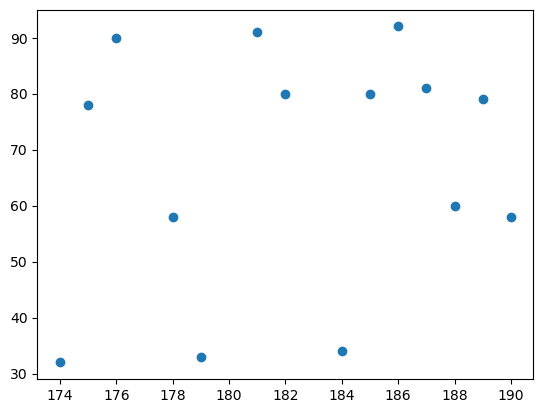

In [53]:
scatter = plt.scatter(x_train,y_train)
plt.show(scatter)

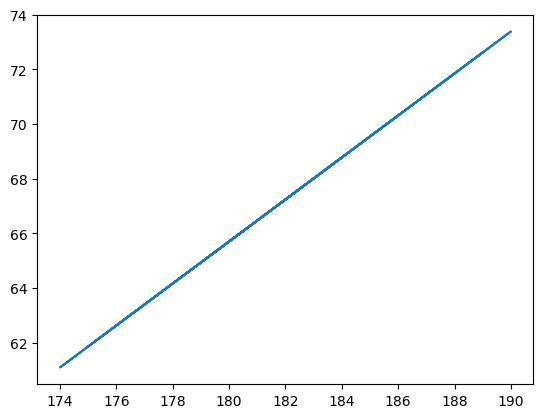

In [55]:
slope_of_best_fit = plt.plot(x_train,regression.predict(x_train))
plt.show(slope_of_best_fit)